**Import libraries**

In [18]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

**Read Datasets**

In [20]:
#read the data set of "application_data" in inp0.
inp0= pd.read_csv('/content/application_data.csv')
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#read the data set of "previous_application" in inp1.
inp1= pd.read_csv('/content/previous_application (1).csv')
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Dataset - 1(Application data)**

In [22]:
#print the shape of the dataset
inp0.shape

(307511, 122)

In [23]:
#print the information of variables to check their data types
inp0.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [24]:
#Print the percentage of null values and sort it in descending order
Null_percentage = inp0.isnull().sum() * 100 / len(inp0)
Null_percentage.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [25]:
#Print the dataset where null values are more than 40%
NULL_Greater_40 = Null_percentage[Null_percentage > 40].sort_values(ascending = False)
NULL_Greater_40

COMMONAREA_AVG                  69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

In [26]:
NULL_Greater_40.index

Index(['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_MEDI',
       'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_AVG'

In [27]:
#delete columns where null values are more than 40% as it can distort the dataset.
inp0.drop(columns = ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_MEDI',
       'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace = True)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Re-check the missing values in descending order
inp0.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 73, dtype: int64

In [29]:
#Count the missing values of OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.isnull().sum()

96391

In [30]:
#Impute missing values of Occupation_type with 'Others' to analyse the distribution of various occupation.
inp0['OCCUPATION_TYPE'] = inp0.OCCUPATION_TYPE.fillna('Others')
inp0['OCCUPATION_TYPE']

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507         Others
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [31]:
#Cross check missing values in OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.isnull().sum()

0

In [32]:
#Count of OCCUPATION_TYPE to understand people who applied for loan belongs to which occupation 
inp0.OCCUPATION_TYPE.value_counts()

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

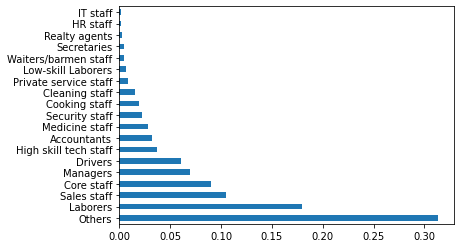

In [ ]:
#Plot the bar graph of OCCUPATION_TYPE percentage to check the distribution
inp0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
#Count the missing values of NAME_INCOME_TYPE
inp0.NAME_INCOME_TYPE.isnull().sum()

0

In [ ]:
#Count of NAME_INCOME_TYPE to understand the way of income.
inp0.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

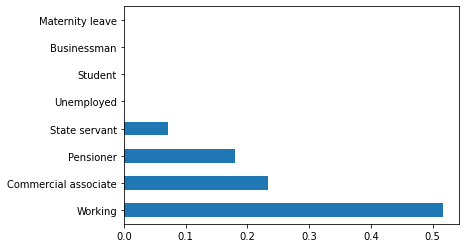

In [ ]:
#Plot the bar graph of NAME_INCOME_TYPE to understand the maximum no. visually.
inp0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
#Convert DAYS_BIRTH into year and in positive value
inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH'].abs()
inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH']/365
inp0['DAYS_BIRTH']


0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [ ]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp0['age_group'] = pd.cut(inp0.DAYS_BIRTH, [0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])
inp0['age_group']

0           <30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506      <30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: age_group, Length: 307511, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [ ]:
inp0.DAYS_BIRTH.head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: DAYS_BIRTH, dtype: float64

In [ ]:
inp0.age_group.value_counts(normalize=True)

30-40    0.267659
40-50    0.248905
50-60    0.221332
<30      0.146405
60+      0.115700
Name: age_group, dtype: float64

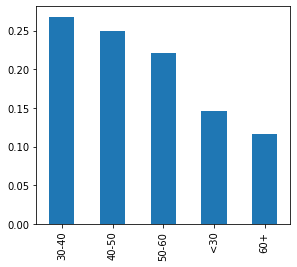

In [ ]:
#Plot the percentage of each age buckets to understand which age group applied most application.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp0['age_group'].value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
#Print the count of FLAG_CONT_MOBILE to understand the phone response
inp0.FLAG_CONT_MOBILE.value_counts(normalize=True)


1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64

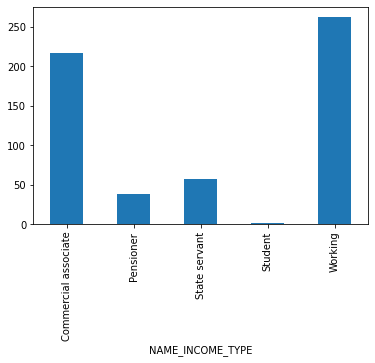

In [ ]:
#Plot a graph of not reachable numbers to understand to which income type they belong
inp0[inp0['FLAG_CONT_MOBILE']==0].groupby('NAME_INCOME_TYPE')['NAME_INCOME_TYPE'].aggregate('count').plot.bar()
plt.show()

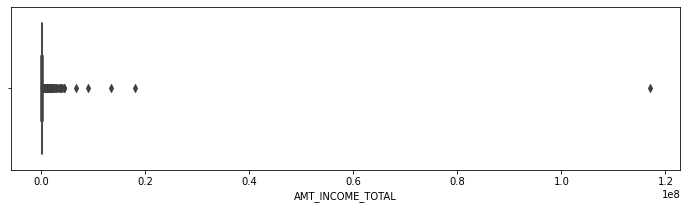

In [ ]:
#Print box plot for AMT_INCOME_TOTAL
plt.figure(figsize = (12,3))
sns.boxplot(inp0['AMT_INCOME_TOTAL'])
plt.show()
#In AMT_INCOME_TOTAL only single high value data point is present as outlier.

In [11]:
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

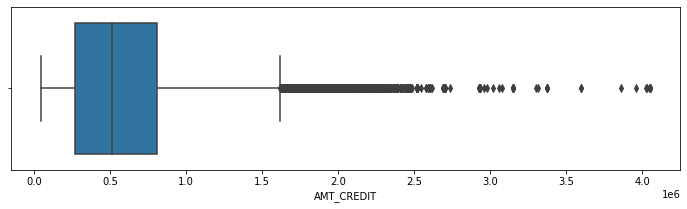

In [ ]:
#Print box plot for AMT_CREDIT 
plt.figure(figsize = (12,3))
sns.boxplot(inp0['AMT_CREDIT'])
plt.show()
#AMT_CREDIT has little bit more outliers and can be imputed with median.

In [10]:
inp0.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

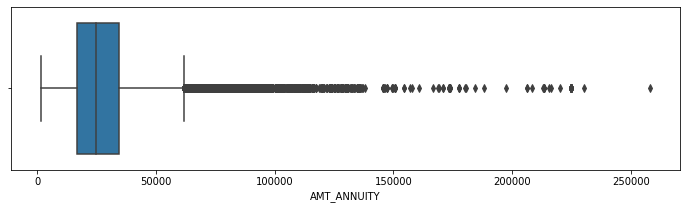

In [ ]:
#Print box plot for AMT_ANNUITY
plt.figure(figsize = (12,3))
sns.boxplot(inp0['AMT_ANNUITY'])
plt.show()
#1st quartiles and 3rd quartile for AMT_ANNUITY is moved towards first quartile.

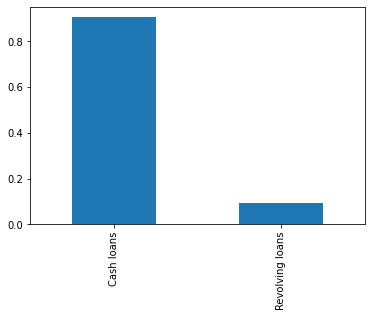

In [ ]:
#Plot a graph of contract type to understand the count.
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()


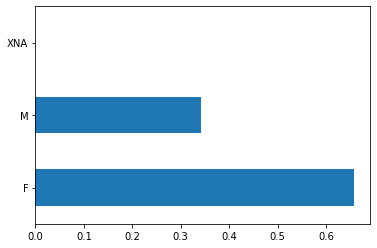

In [ ]:
#Plot a graph to get the gender wise loan application bifurcation 
inp0.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

**Dataset - 2(Previous Application data)**

In [33]:
#print the shape of the dataset
inp1.shape

(1670214, 37)

In [34]:
#print the information of variables to check their data types
inp1.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [35]:
#Print the count of null values
inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [36]:
#Print the percentage of null values and sort it in descending order
Missing_percentage = inp1.isnull().sum()*100/len(inp1)
Missing_percentage.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [37]:
#Print the dataset where null values are more than 40%
NULL_Greater_40 = Missing_percentage[Missing_percentage>40].sort_values(ascending=False)
NULL_Greater_40

RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [38]:
NULL_Greater_40.index

Index(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [39]:
#delete columns where null values are more than 40% as it can distort the dataset.
inp1.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [40]:
#Re-check the missing values in descending order
inp1.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
CODE_REJECT_REASON                  0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

In [41]:
#Merge dataset 1 and dataset 2
Merge_df = pd.merge(left = inp0, right = inp1, how='inner',on='SK_ID_CURR',suffixes='_x')
Merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [42]:
#Remove XAP and XNA values from NAME_CASH_LOAN_PURPOSE column
inp1_del = Merge_df[Merge_df.NAME_CASH_LOAN_PURPOSE != "XAP"]
inp1_del = inp1_del[inp1_del.NAME_CASH_LOAN_PURPOSE != "XNA"]
inp1_del

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
99,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
110,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
136,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
159,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
160,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413614,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
1413671,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
1413672,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,New,XNA,Cash,walk-in,Country-wide,21,Connectivity,12.0,high,Cash Street: high
1413686,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high


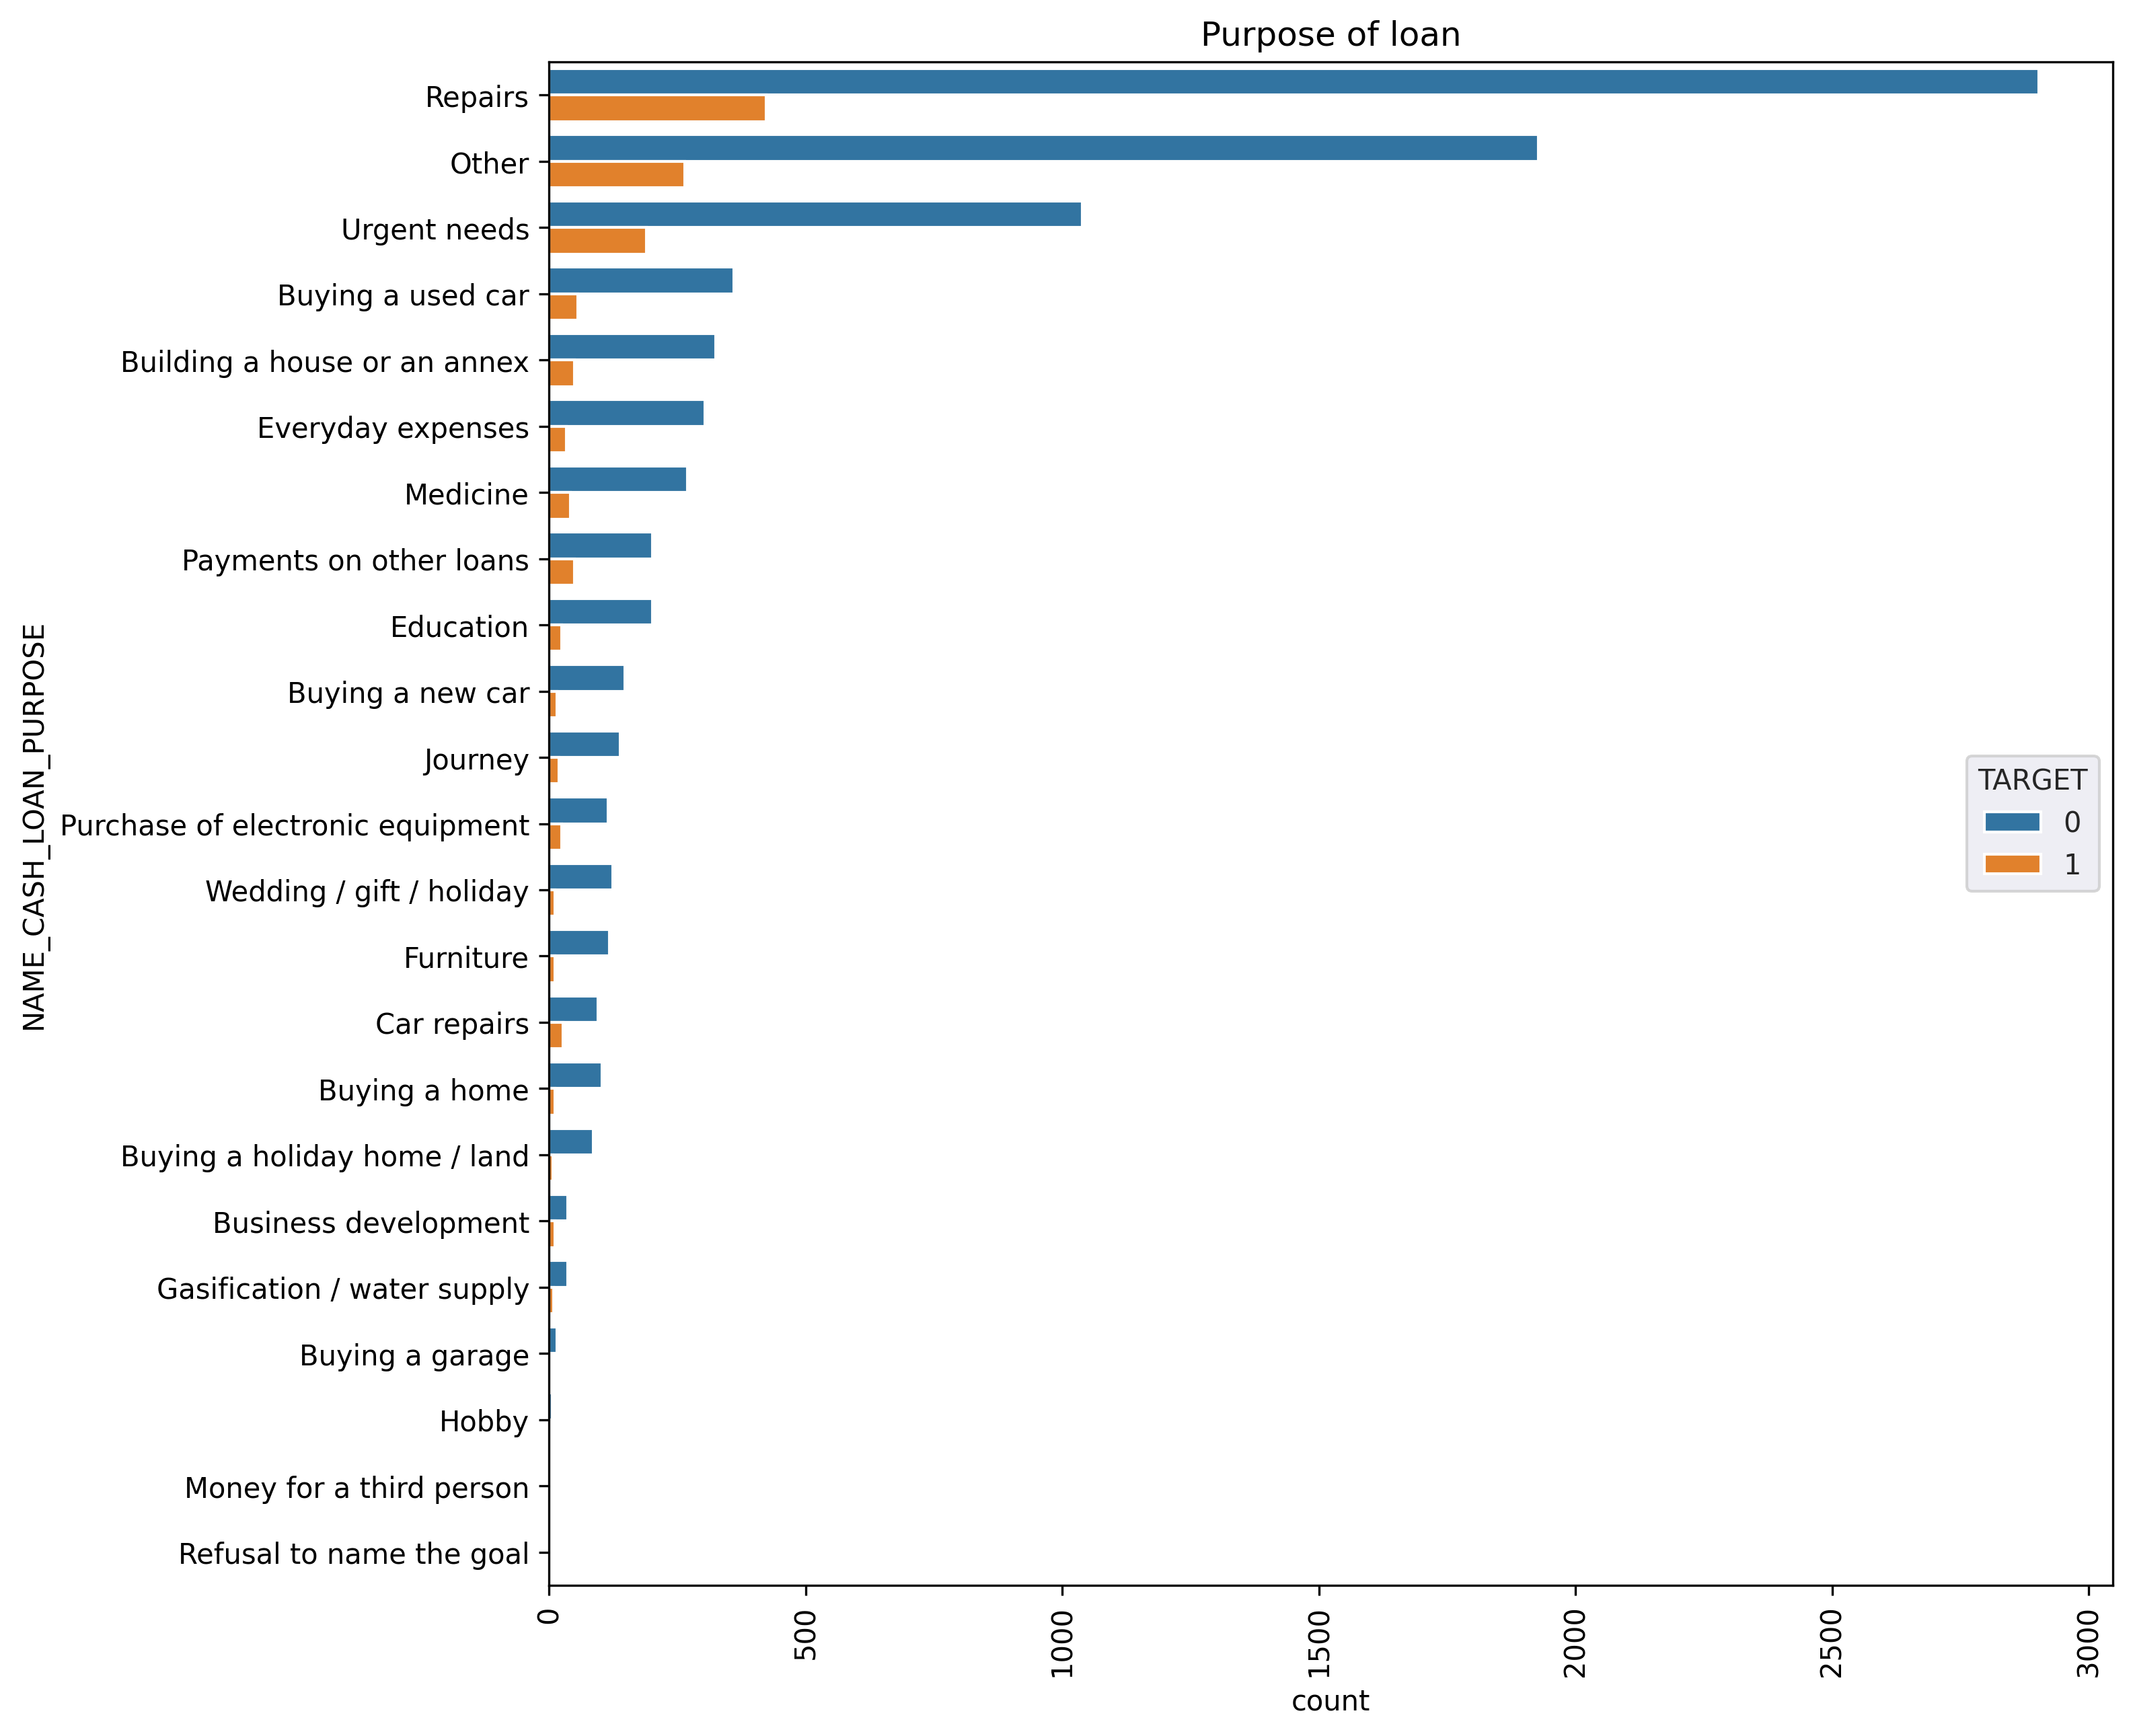

In [ ]:
#Plot a countplot of loan purpose and target.
plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan')
sns.set_style('darkgrid')
ax = sns.countplot(data = inp1_del, y= 'NAME_CASH_LOAN_PURPOSE', order=inp1_del['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.show()

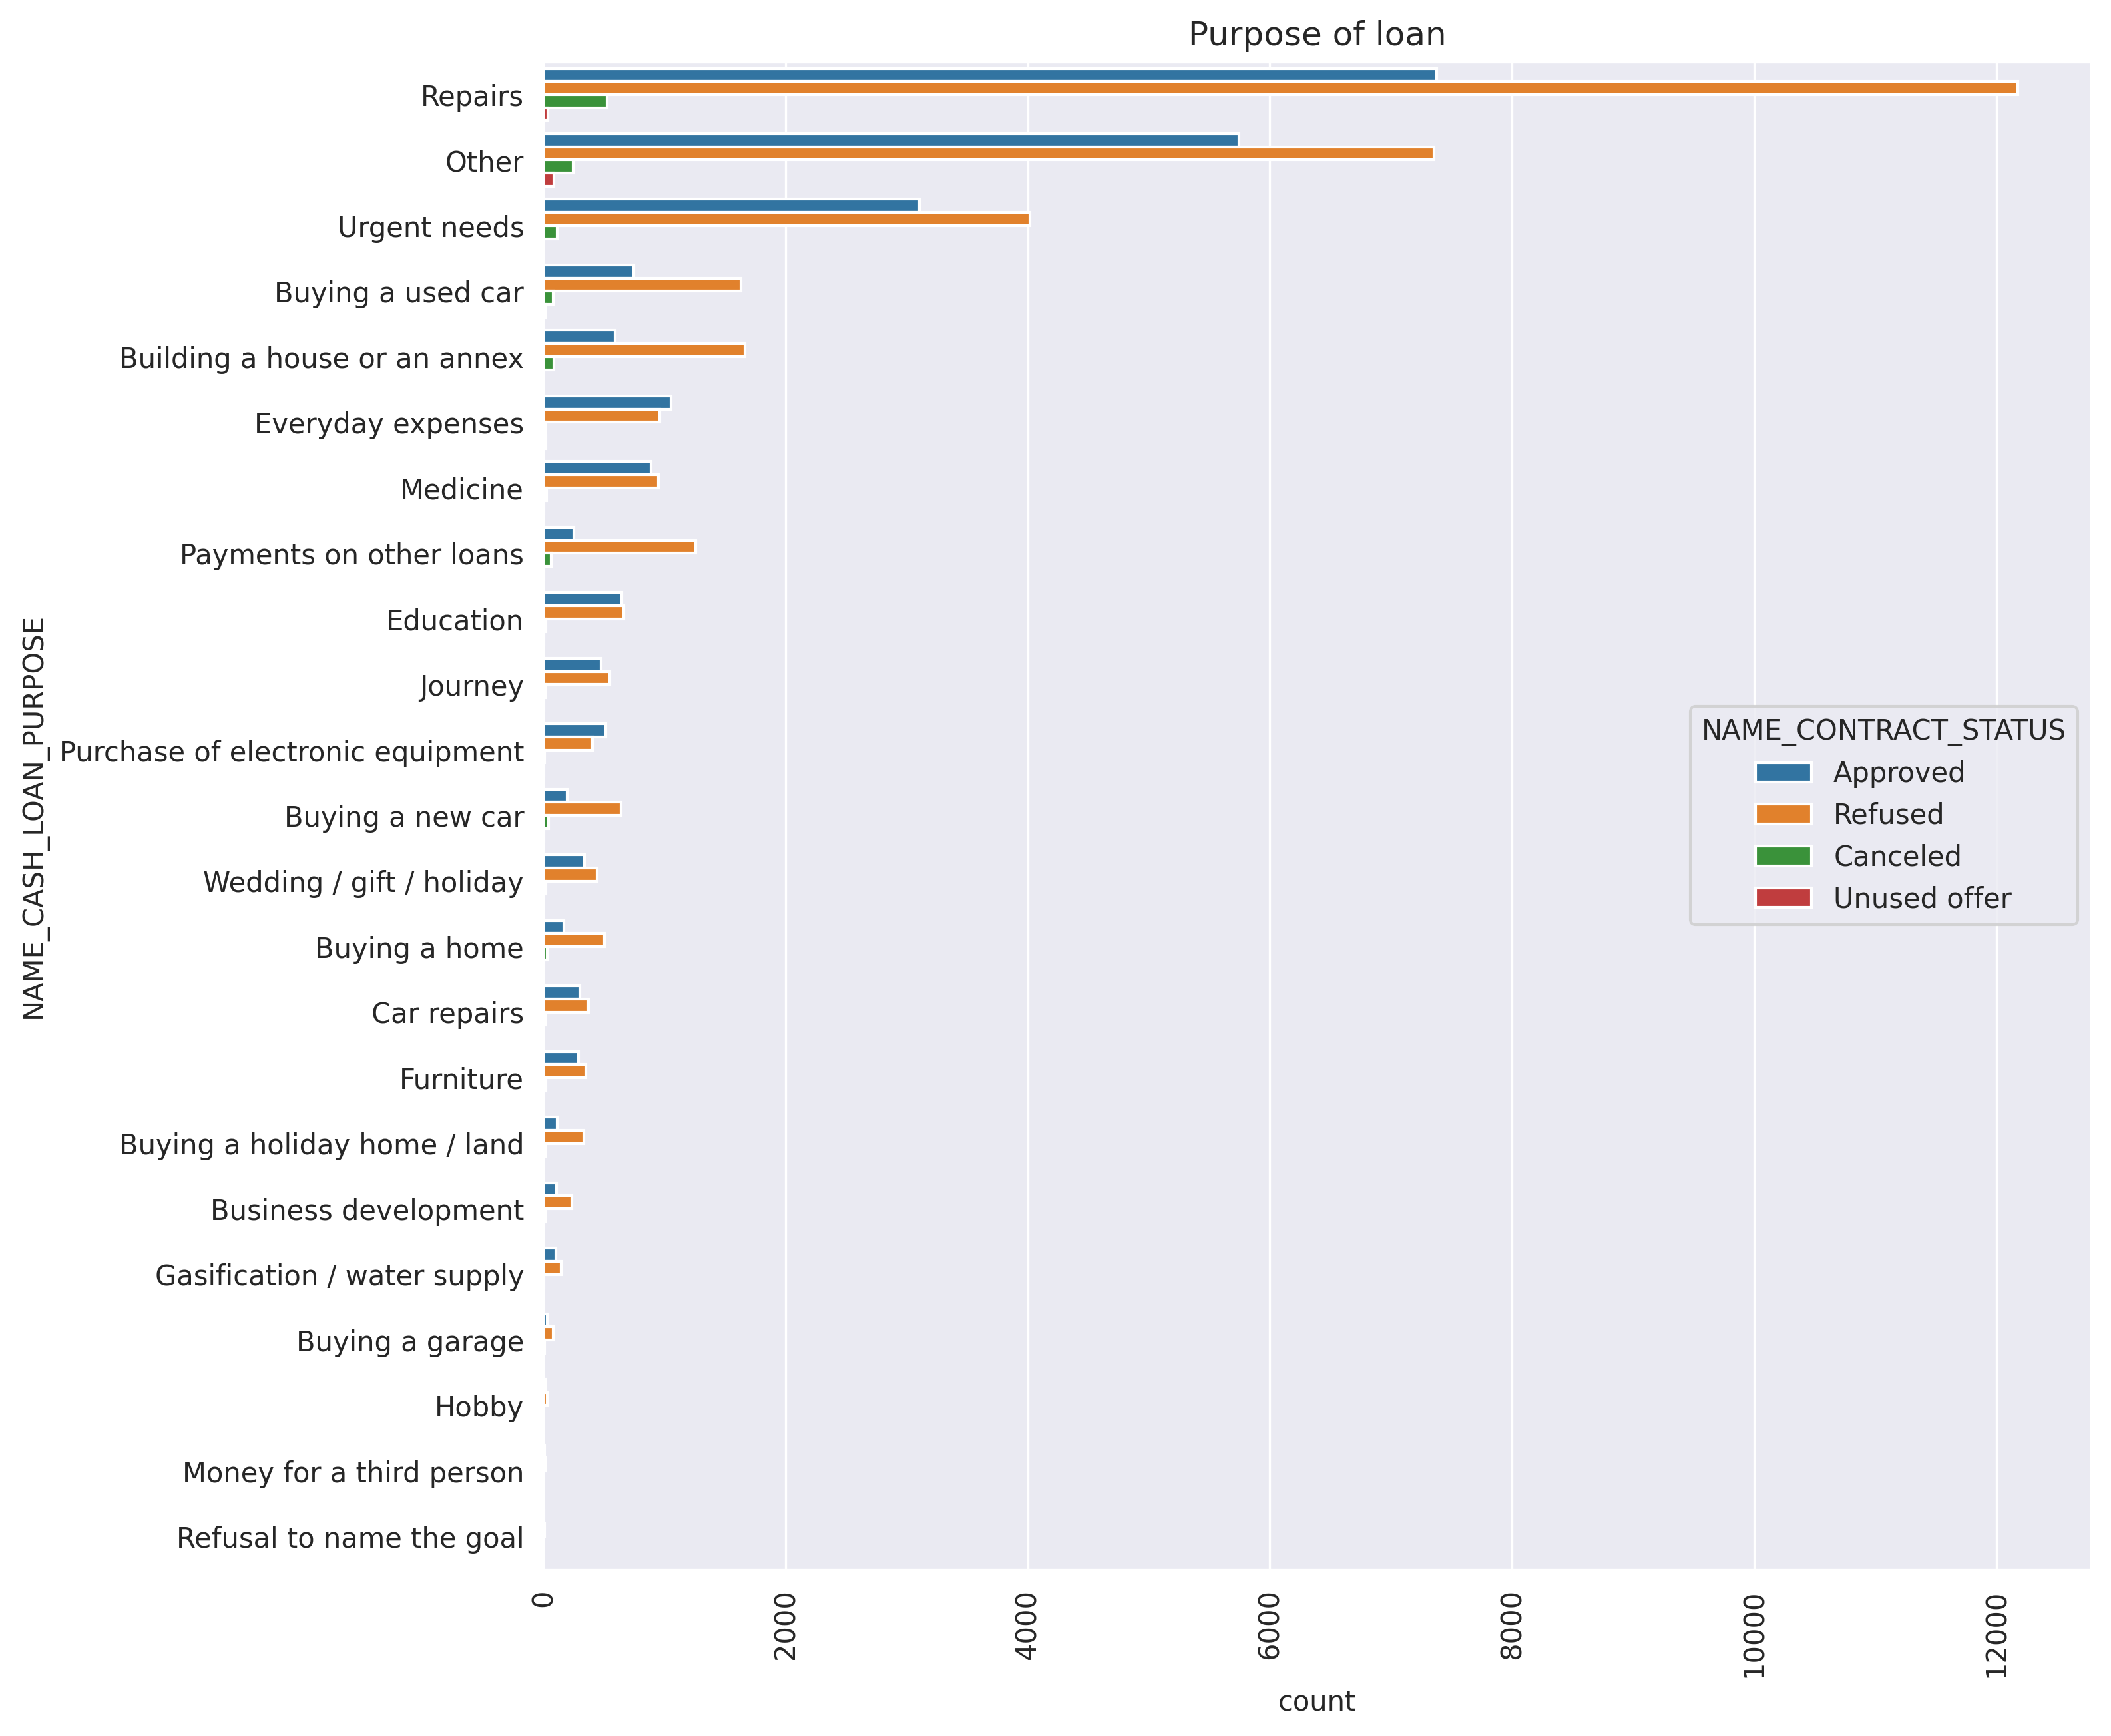

In [ ]:
#Plot a countplot of loan purpose and contract status to get the maxium rejection and approvals.
plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan')
sns.set_style('darkgrid')
ax = sns.countplot(data = inp1_del, y= 'NAME_CASH_LOAN_PURPOSE', order=inp1_del['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.show()

In [ ]:
#Create the client income buckets of <100000, 100000-200000, 200000-300000, 300000-400000, 400000-500000, 500000 and above.
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000','500000 and above']
inp0['AMT_INCOME_RANGE'] = pd.cut(inp0['AMT_INCOME_TOTAL'], bins = bins, labels=slots)

In [ ]:
inp0.AMT_INCOME_RANGE.head()

0    200000-300000
1    200000-300000
2          <100000
3    100000-200000
4    100000-200000
Name: AMT_INCOME_RANGE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' <
                         '400000-500000' < '500000 and above']

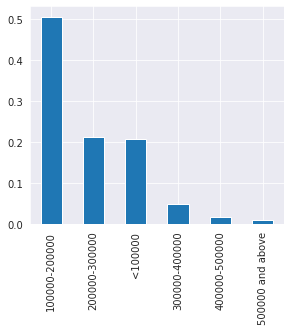

In [ ]:
#inp0.AMT_INCOME_RANGE.plot.bar()
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp0['AMT_INCOME_RANGE'].value_counts(normalize=True).plot.bar()
plt.show()


Text(0.5, 1.0, 'Income type response')

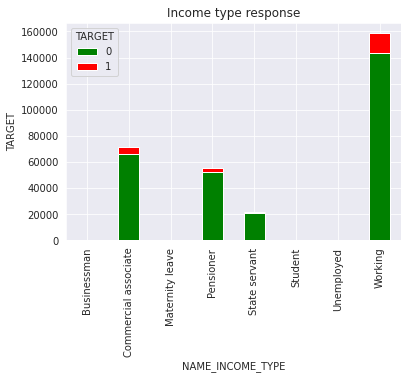

In [ ]:
#Plot a stacked bar to get defaulters in income type category
pivotdf = inp0.pivot_table(index='NAME_INCOME_TYPE', columns='TARGET', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red'])
 
# labels for x & y axis
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('TARGET')
 
# title of plot
plt.title('Income type response')

Text(0.5, 1.0, 'Response on payment method')

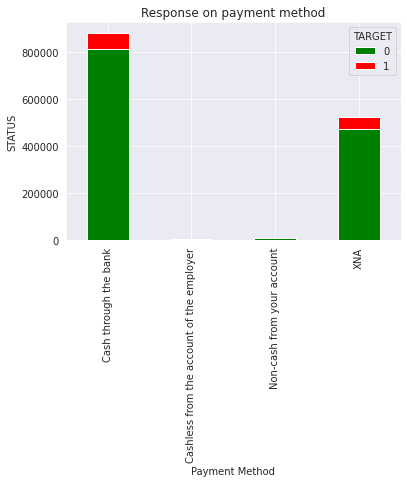

In [ ]:
#Plot a stacked bar to get defaulters on payment method
pivotdf = Merge_df.pivot_table(index='NAME_PAYMENT_TYPE', columns='TARGET', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red']) #, 'blue', 'yellow'])
 
# labels for x & y axis
plt.xlabel('Payment Method')
plt.ylabel('STATUS')
 
# title of plot
plt.title('Response on payment method')

Text(0.5, 1.0, 'Response on income group')

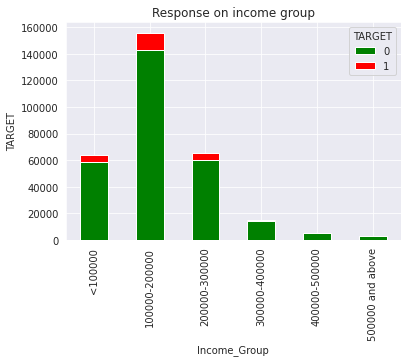

In [ ]:
#Plot a graph to get which income group has more defaulters
pivotdf = inp0.pivot_table(index=inp0.AMT_INCOME_RANGE, columns='TARGET', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red']) #, 'blue', 'yellow'])
 
# labels for x & y axis
plt.xlabel('Income_Group')
plt.ylabel('TARGET')
 
# title of plot
plt.title('Response on income group')

Text(0.5, 1.0, 'Response on age group')

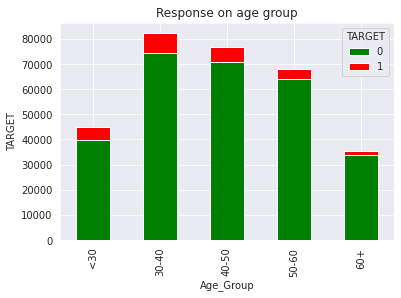

In [ ]:
#Plot a graph to get which age group has more defaulters
pivotdf = inp0.pivot_table(index=inp0.age_group, columns='TARGET', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red']) #, 'blue', 'yellow'])
 
# labels for x & y axis
plt.xlabel('Age_Group')
plt.ylabel('TARGET')
 
# title of plot
plt.title('Response on age group')

Text(0.5, 1.0, 'Contract status response on channel type')

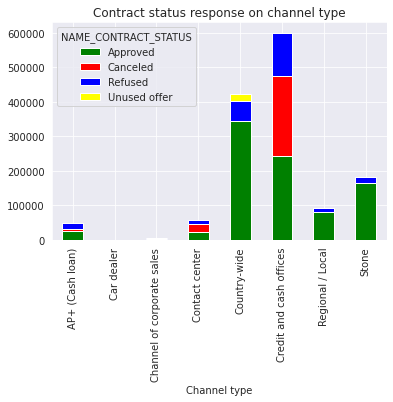

In [ ]:
#Plot a graph to get which channel type is getting more approvals.
pivotdf = Merge_df.pivot_table(index='CHANNEL_TYPE', columns='NAME_CONTRACT_STATUS', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red','blue', 'yellow'])
 
# labels for x & y axis
plt.xlabel('Channel type')
plt.ylabel('')
 
# title of plot
plt.title('Contract status response on channel type')

In [47]:
#Remove XNA values from NAME_SELLER_INDUSTRY column to get better clarity
inp1_rem = Merge_df[Merge_df.NAME_SELLER_INDUSTRY != "XNA"]
inp1_rem.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Repeater,Audio/Video,POS,XNA,Country-wide,8025,Consumer electronics,12.0,high,POS household with interest


Text(0.5, 1.0, 'Contract status response on seller industry')

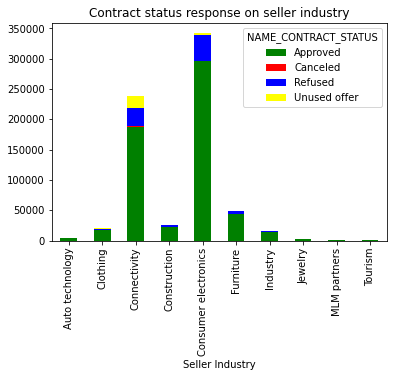

In [44]:
#Plot a graph between and seller industry and contract status.
pivotdf = inp1_del.pivot_table(index='NAME_SELLER_INDUSTRY', columns='NAME_CONTRACT_STATUS', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red','blue', 'yellow'])
 
# labels for x & y axis
plt.xlabel('Seller Industry')
plt.ylabel('')
 
# title of plot
plt.title('Contract status response on seller industry')

Text(0.5, 1.0, 'Education level target rate')

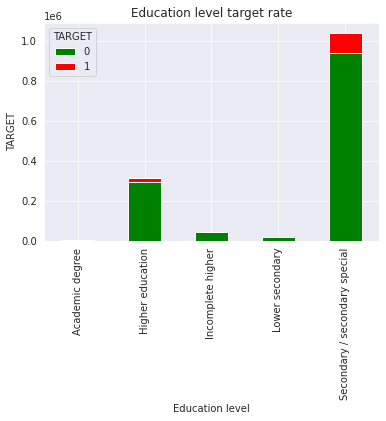

In [ ]:
#Plot a stacked bar to get defaulters on payment method
pivotdf = Merge_df.pivot_table(index='NAME_EDUCATION_TYPE', columns='TARGET', aggfunc='size', fill_value=0)
pivotdf.plot(kind='bar', stacked=True, color=['green','red']) #, 'blue', 'yellow'])
 
# labels for x & y axis
plt.xlabel('Education level')
plt.ylabel('TARGET')
 
# title of plot
plt.title('Education level target rate')